In [121]:
import pandas as pd 
import numpy as np

## Load the Dataset

In [122]:
df = pd.read_csv('https://media.githubusercontent.com/media/KhalPrawira/Movie_Recomendation_ISmile_TuBes/refs/heads/main/anime-filtered.csv')
df.head()

,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,...,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,"In the year 2071, humanity has colonized sever...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,"other day, another bounty—such is the life of ...",Movie,1,"Sep 1, 2001",...,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,"Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",...,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),ches are individuals with special powers like ...,TV,26,"Jul 2, 2002 to Dec 24, 2002",...,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108


## EDA

### Data Information

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14952 entries, 0 to 14951
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       14952 non-null  int64  
 1   Name           14952 non-null  object 
 2   Score          14952 non-null  float64
 3   Genres         14952 non-null  object 
 4   English name   14952 non-null  object 
 5   Japanese name  14952 non-null  object 
 6   sypnopsis      13602 non-null  object 
 7   Type           14952 non-null  object 
 8   Episodes       14952 non-null  object 
 9   Aired          14952 non-null  object 
 10  Premiered      14952 non-null  object 
 11  Producers      14952 non-null  object 
 12  Licensors      14952 non-null  object 
 13  Studios        14952 non-null  object 
 14  Source         14952 non-null  object 
 15  Duration       14952 non-null  object 
 16  Rating         14952 non-null  object 
 17  Ranked         13231 non-null  float64
 18  Popula

In [124]:
df.describe()

,anime_id,Score,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
count,14952.000000,14952.000000,13231.000000,14952.000000,1.495200e+04,14952.000000,14952.000000,1.495200e+04,14952.000000,14952.000000
mean,19017.432718,6.511526,6829.853828,7465.970907,4.068648e+04,537.629882,2619.806715,2.594310e+04,1121.307986,1377.861891
std,14588.758618,0.807185,4168.929475,4313.169381,1.348744e+05,4399.016449,15190.098642,9.812729e+04,4613.759597,5110.874501
min,1.000000,1.850000,1.000000,1.000000,2.000000e+02,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,4602.500000,6.080000,3309.500000,3732.000000,7.360000e+02,1.000000,27.000000,2.460000e+02,14.000000,48.000000
50%,16729.000000,6.510000,6618.000000,7466.500000,3.493500e+03,6.000000,127.000000,1.515500e+03,78.000000,102.000000
75%,33513.250000,7.010000,9942.000000,11194.000000,1.919325e+04,47.000000,723.000000,9.797000e+03,388.250000,377.000000
max,48492.000000,9.190000,15780.000000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000


In [125]:
df.describe(include='object')

,Name,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating
count,14952,14952,14952,14952,13602,14952,14952,14952,14952,14952,14952,14952,14952,14952,14952
unique,14949,4839,6252,14176,12890,7,199,10722,231,3714,231,1048,16,301,7
top,Maou Gakuin no Futekigousha: Shijou Saikyou no...,Hentai,Unknown,Unknown,No synopsis information has been added to this...,TV,1,Unknown,Unknown,Unknown,Unknown,Unknown,Manga,24 min. per ep.,PG-13 - Teens 13 or older
freq,3,967,8554,33,466,4650,6563,185,10456,6152,11007,4912,3764,1706,5975


### Missing Values

In [126]:
df.isnull().sum()

anime_id            0
Name                0
Score               0
Genres              0
English name        0
Japanese name       0
sypnopsis        1350
Type                0
Episodes            0
Aired               0
Premiered           0
Producers           0
Licensors           0
Studios             0
Source              0
Duration            0
Rating              0
Ranked           1721
Popularity          0
Members             0
Favorites           0
Watching            0
Completed           0
On-Hold             0
Dropped             0
dtype: int64

### Duplicates

In [127]:
df.duplicated().sum()

0

### Visualization

#### Genres

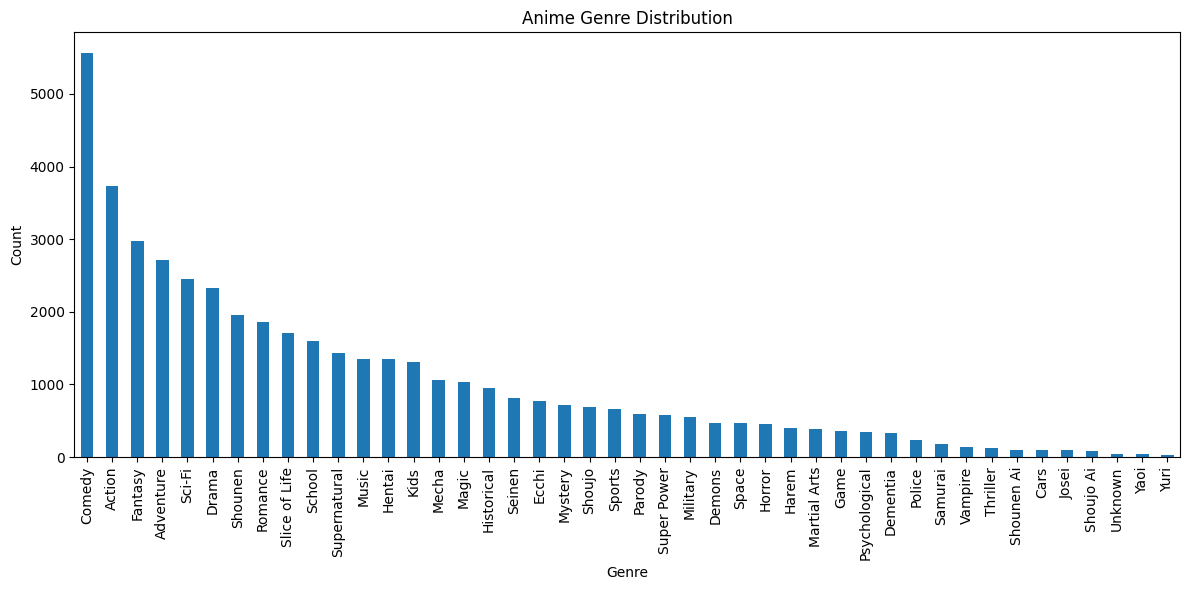

In [128]:
import matplotlib.pyplot as plt

# Split genres and count occurrences
genre_counts = df['Genres'].str.split(', ').explode().value_counts()

# Plot bar chart
plt.figure(figsize=(12,6))
genre_counts.plot(kind='bar')
plt.title('Anime Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### Rating

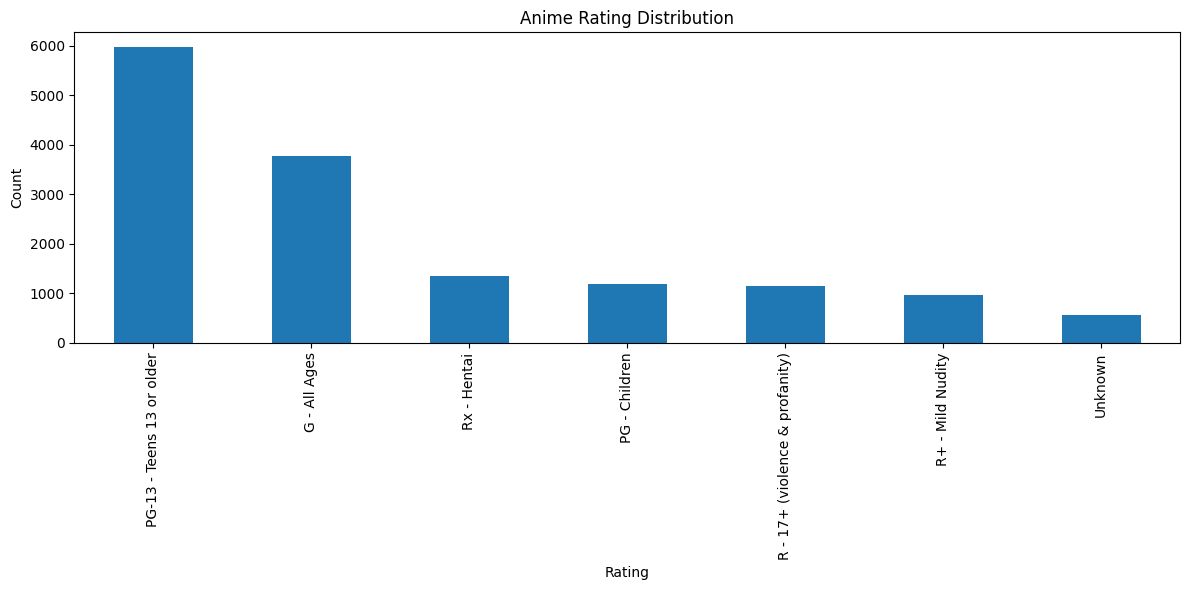

In [129]:
rating_counts = df['Rating'].value_counts()

# Plot bar chart
plt.figure(figsize=(12,6))
rating_counts.plot(kind='bar')
plt.title('Anime Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### Type

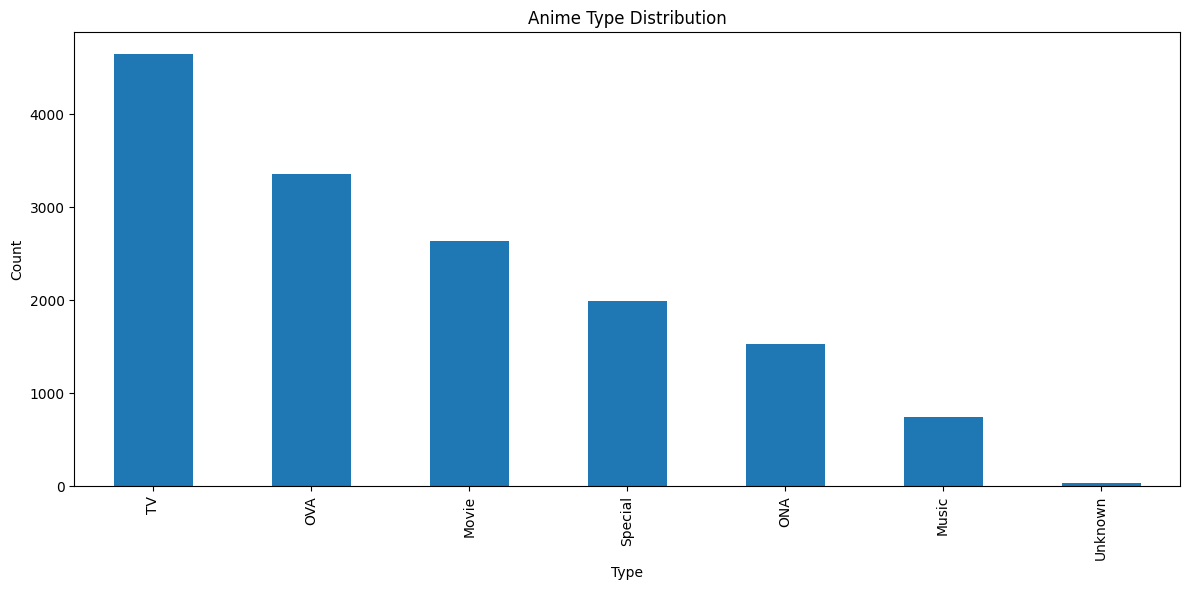

In [130]:
Type_counts = df['Type'].value_counts()

# Plot bar chart
plt.figure(figsize=(12,6))
Type_counts.plot(kind='bar')
plt.title('Anime Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Feature Engineering

### Dealing with Missing Values

In [131]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13229 entries, 0 to 14943
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       13229 non-null  int64  
 1   Name           13229 non-null  object 
 2   Score          13229 non-null  float64
 3   Genres         13229 non-null  object 
 4   English name   13229 non-null  object 
 5   Japanese name  13229 non-null  object 
 6   sypnopsis      13229 non-null  object 
 7   Type           13229 non-null  object 
 8   Episodes       13229 non-null  object 
 9   Aired          13229 non-null  object 
 10  Premiered      13229 non-null  object 
 11  Producers      13229 non-null  object 
 12  Licensors      13229 non-null  object 
 13  Studios        13229 non-null  object 
 14  Source         13229 non-null  object 
 15  Duration       13229 non-null  object 
 16  Rating         13229 non-null  object 
 17  Ranked         13229 non-null  float64
 18  Popularity 

### Selecting Columns to Use

In [132]:
df_selected = df[['Name', 'Score', 'Genres', 'English name', 'Japanese name', 'sypnopsis', 'Type', 'Rating', 'Episodes']]
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13229 entries, 0 to 14943
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           13229 non-null  object 
 1   Score          13229 non-null  float64
 2   Genres         13229 non-null  object 
 3   English name   13229 non-null  object 
 4   Japanese name  13229 non-null  object 
 5   sypnopsis      13229 non-null  object 
 6   Type           13229 non-null  object 
 7   Rating         13229 non-null  object 
 8   Episodes       13229 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.0+ MB


### Renaming sypnopsis Column

In [133]:
df_selected = df_selected.rename(columns={'sypnopsis': 'Synopsis'})

### Dealing with Unknown Values

In [134]:
unknown_columns = [col for col in df_selected.columns if df_selected[col].astype(str).str.lower().eq('unknown').any()]
print("Columns with 'Unknown' values:", unknown_columns)

Columns with 'Unknown' values: ['Genres', 'English name', 'Japanese name', 'Rating', 'Episodes']


In [135]:
unknown_stay = ['English name', 'Japanese name']
unknown_remove = ['Genres', 'Rating', 'Type']

#### Unknown Stay

In [136]:
df_selected[df_selected['English name'] == 'Unknown']

,Name,Score,Genres,English name,Japanese name,Synopsis,Type,Rating,Episodes
5,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",Unknown,アイシールド21,Sena is like any other shy kid starting high s...,TV,PG-13 - Teens 13 or older,145
7,Hungry Heart: Wild Striker,7.59,"Slice of Life, Comedy, Sports, Shounen",Unknown,ハングリーハート Wild Striker,Kyosuke Kano has lived under the shadow of his...,TV,PG-13 - Teens 13 or older,52
8,Initial D Fourth Stage,8.15,"Action, Cars, Sports, Drama, Seinen",Unknown,頭文字〈イニシャル〉D FOURTH STAGE,Takumi Fujiwara finally joins Ryousuke and Kei...,TV,PG-13 - Teens 13 or older,24
13,Ring ni Kakero 1,6.38,"Action, Shounen, Sports",Unknown,リングにかけろ１,"In order to fulfill their dead father's wish, ...",TV,PG - Children,12
19,Zipang,7.51,"Action, Military, Sci-Fi, Historical, Drama, S...",Unknown,ジパング,"ai, an improved Kongou-class Aegis guided miss...",TV,PG-13 - Teens 13 or older,26
...,...,...,...,...,...,...,...,...,...
14909,Kimetsu Gakuen: Valentine-hen,6.59,Comedy,Unknown,キメツ学園 バレンタイン編,Valentine's Day special for Kimetsu no Yaiba ....,ONA,PG-13 - Teens 13 or older,4
14910,Heikousen,7.52,"Music, Romance",Unknown,平行線,"usic video for Eve and suis' song Heikousen , ...",Music,G - All Ages,1
14911,Kuiba Zhi Shu Tu,6.51,"Adventure, Fantasy",Unknown,魁拔之殊途,"The story takes place in Lingshan, where a gro...",ONA,Unknown,7
14916,Kuro Gal ni Natta kara Shinyuu to shitemita.,6.51,"Romance, Shounen Ai",Unknown,黒ギャルになったから親友としてみた。,Shion and Rui are the dream team when it comes...,TV,R+ - Mild Nudity,Unknown


In [137]:
df_selected[df_selected['Japanese name'] == 'Unknown']

,Name,Score,Genres,English name,Japanese name,Synopsis,Type,Rating,Episodes
5745,Ginga Hyouryuu Vifam Recaps,6.51,"Action, Sci-Fi, Adventure, Mecha",Unknown,Unknown,Summaries of the first (A Letter From Katue) a...,OVA,Unknown,2
10087,Why,4.90,Dementia,Unknown,Unknown,oxing ring turns into a stage for abstract ani...,Movie,G - All Ages,1
10114,Walking Man,4.17,Dementia,Unknown,Unknown,Film by Tanaami Keiichi.,Movie,G - All Ages,1
10115,Why Re-Mix 2002,4.92,Dementia,Unknown,Unknown,Film by Tanaami Keiichi.,Movie,G - All Ages,1
10171,Memory of Red,4.56,Dementia,Unknown,Unknown,short animation by Nobuhiro Aihara.,Movie,G - All Ages,1
10401,Master Blaster,4.38,"Music, Dementia",Unknown,Unknown,Short film by Kabuki Sawako with music by Suga...,Music,R+ - Mild Nudity,1
10883,2010,4.86,Music,Unknown,Unknown,"music video for The Telephones' song ""2010"".",Music,G - All Ages,1
11137,Color Noise,4.56,Dementia,Unknown,Unknown,Short animation by Yutaro Kubo.,ONA,G - All Ages,1
11142,Aftermath,6.05,"Military, Music, Drama",Aftermath,Unknown,The video is the result of Muse’s on-going cre...,Music,G - All Ages,1
11187,Moving Colors,5.47,Dementia,Unknown,Unknown,animated short film produced by past students ...,Movie,G - All Ages,1


In [138]:
df_selected[unknown_stay] = df_selected[unknown_stay].replace('Unknown', '-')

In [139]:
df_selected.head()

,Name,Score,Genres,English name,Japanese name,Synopsis,Type,Rating,Episodes
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,"In the year 2071, humanity has colonized sever...",TV,R - 17+ (violence & profanity),26
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,"other day, another bounty—such is the life of ...",Movie,R - 17+ (violence & profanity),1
2,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,"Vash the Stampede is the man with a $$60,000,0...",TV,PG-13 - Teens 13 or older,26
3,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),ches are individuals with special powers like ...,TV,PG-13 - Teens 13 or older,26
4,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,It is the dark century and the people are suff...,TV,PG - Children,52


#### Unknown_Remove

In [140]:
df_selected[df_selected['Genres'] == 'Unknown']

,Name,Score,Genres,English name,Japanese name,Synopsis,Type,Rating,Episodes
9486,Maze,6.51,Unknown,-,MAZE,stract stop motion animation by Tochka.,Movie,G - All Ages,1
9487,PiKA PiKA,5.12,Unknown,-,PiKA PiKA,"stract short film, the first ""lightning doodle...",Movie,G - All Ages,1
9676,Chanda Gou,6.51,Unknown,M.S. Chanda,チャンダ号,"Independent animation by Yanagihara Ryouhei, m...",Movie,G - All Ages,1
9712,Metropolis (2009),5.93,Unknown,-,METROPOLIS,ai Mizue's first time experimenting with geome...,Movie,G - All Ages,1
9714,Minamo,6.51,Unknown,-,minamo,zue set up a camera over a water tray with an ...,Movie,G - All Ages,1
9793,Kobutori (1957),6.51,Unknown,-,こぶとり,short puppet animation movie by Tadahito Mochi...,Movie,G - All Ages,1
9794,Bunbuku Chagama (1958),5.49,Unknown,-,ぶんぶくちゃがま,short puppet animation movie by Tadahito Mochi...,Movie,G - All Ages,1
9795,Ou-sama Ninatta Kitsune,6.51,Unknown,-,王様になった狐,short puppet animation movie by Tadahito Mochi...,Movie,G - All Ages,1
9796,Fukusuke,5.62,Unknown,-,ふくすけ,short movie by Ryouichi Yokoyama.,Movie,G - All Ages,1
10021,Arigatou Gomennasai,4.80,Unknown,Thank You and Sorry,ありがとうごめんなさい,short animation by Taku Furukawa.,Movie,G - All Ages,1


In [141]:
df_selected[df_selected['Rating'] == 'Unknown']

,Name,Score,Genres,English name,Japanese name,Synopsis,Type,Rating,Episodes
659,High School! Kimengumi,7.27,"Comedy, Parody, Romance, School, Shounen",Funny Faces in High School,ハイスクール！奇面組,group of 5 male high school students that call...,TV,Unknown,86
1531,Dotto Koni-chan,7.26,Comedy,.Koni-chan,ドッとKONIちゃん,Koni (whose character is based on the famous S...,TV,Unknown,26
1556,Shin Seiki Den Mars,5.67,"Mecha, Sci-Fi, Shounen",-,神世紀伝 マーズ,"ars is discovered on a forming volcano island,...",TV,Unknown,13
1699,Silk Road Shounen Yuuto,6.51,"Adventure, Fantasy, Historical",-,シルクロード少年 ユート,"hen a boy Yuto visits Qinghai in China, he is ...",TV,Unknown,26
2180,Firestorm,5.65,"Action, Military, Sci-Fi, Adventure, Mecha",-,FIRESTORM ファイアーストーム,It is the year 2104 AD. The terrible war is ov...,TV,Unknown,26
...,...,...,...,...,...,...,...,...,...
14879,Mashiro no Oto Mini,6.51,Slice of Life,-,ましろのおと ミニ,ashiro no Oto anime released on the official T...,ONA,Unknown,Unknown
14890,Liu Xing Huan Jian,6.51,"Action, Fantasy",-,流星幻剑,No synopsis information has been added to this...,ONA,Unknown,60
14911,Kuiba Zhi Shu Tu,6.51,"Adventure, Fantasy",-,魁拔之殊途,"The story takes place in Lingshan, where a gro...",ONA,Unknown,7
14915,Inou no AICis: ESP & High School Detective,6.51,"Mystery, Supernatural, School",AICis the Supernatural,異能のアイシス ESP & HIGH SCHOOL DETECTIVE,The anime is set in the fictional Geso ward in...,ONA,Unknown,Unknown


In [142]:
for col in unknown_remove:
    df_selected = df_selected[df_selected[col] != 'Unknown']
df_selected.reset_index(drop=True, inplace=True)

In [143]:
df_selected[df_selected['Rating'] == 'Unknown']

,Name,Score,Genres,English name,Japanese name,Synopsis,Type,Rating,Episodes


#### Episodes

In [144]:
df_selected[df_selected['Episodes'] == 'Unknown']

,Name,Score,Genres,English name,Japanese name,Synopsis,Type,Rating,Episodes
11,One Piece,8.52,"Action, Adventure, Comedy, Super Power, Drama,...",One Piece,ONE PIECE,"Gol D. Roger was known as the ""Pirate King,"" t...",TV,PG-13 - Teens 13 or older,Unknown
203,Detective Conan,8.16,"Adventure, Mystery, Comedy, Police, Shounen",Case Closed,名探偵コナン,"Shinichi Kudou, a high school student of astou...",TV,PG-13 - Teens 13 or older,Unknown
843,Crayon Shin-chan,7.69,"Slice of Life, Comedy, Ecchi, School, Seinen",Shin Chan,クレヨンしんちゃん,There is no such thing as an uneventful day in...,TV,PG - Children,Unknown
1059,Nintama Rantarou,7.03,"Comedy, Kids",-,忍たま乱太郎,"antarou, Shinbei and Kirimaru are ninja appren...",TV,G - All Ages,Unknown
1694,Sore Ike! Anpanman,6.38,"Comedy, Kids, Fantasy",-,それいけ！アンパンマン,"One night, a Star of Life falls down the chimn...",TV,PG - Children,Unknown
...,...,...,...,...,...,...,...,...,...
12824,Holo no Graffiti,8.58,Comedy,Holo Graffiti,ホロのぐらふぃてぃ,From unraveling the secrets of opening and clo...,ONA,PG-13 - Teens 13 or older,Unknown
12836,Yami Shibai 8,6.09,"Dementia, Horror, Supernatural",-,闇芝居 8期,Eighth season of Yami Shibai .,TV,PG-13 - Teens 13 or older,Unknown
12839,Pui Pui Molcar,8.33,Kids,-,PUI PUI モルカー,The stage sets in a world where guinea pigs be...,TV,G - All Ages,Unknown
12850,D4DJ Petit Mix,6.51,"Music, Comedy",D4DJ Petit Mix,ぷっちみく♪,d within the D4DJ Photon Maiden TV program.,TV,PG-13 - Teens 13 or older,Unknown


In [145]:
df_selected['Episodes'] = df_selected['Episodes'].replace('Unknown', 'On going')
df_selected[df_selected['Episodes'] == 'On going']

,Name,Score,Genres,English name,Japanese name,Synopsis,Type,Rating,Episodes
11,One Piece,8.52,"Action, Adventure, Comedy, Super Power, Drama,...",One Piece,ONE PIECE,"Gol D. Roger was known as the ""Pirate King,"" t...",TV,PG-13 - Teens 13 or older,On going
203,Detective Conan,8.16,"Adventure, Mystery, Comedy, Police, Shounen",Case Closed,名探偵コナン,"Shinichi Kudou, a high school student of astou...",TV,PG-13 - Teens 13 or older,On going
843,Crayon Shin-chan,7.69,"Slice of Life, Comedy, Ecchi, School, Seinen",Shin Chan,クレヨンしんちゃん,There is no such thing as an uneventful day in...,TV,PG - Children,On going
1059,Nintama Rantarou,7.03,"Comedy, Kids",-,忍たま乱太郎,"antarou, Shinbei and Kirimaru are ninja appren...",TV,G - All Ages,On going
1694,Sore Ike! Anpanman,6.38,"Comedy, Kids, Fantasy",-,それいけ！アンパンマン,"One night, a Star of Life falls down the chimn...",TV,PG - Children,On going
...,...,...,...,...,...,...,...,...,...
12824,Holo no Graffiti,8.58,Comedy,Holo Graffiti,ホロのぐらふぃてぃ,From unraveling the secrets of opening and clo...,ONA,PG-13 - Teens 13 or older,On going
12836,Yami Shibai 8,6.09,"Dementia, Horror, Supernatural",-,闇芝居 8期,Eighth season of Yami Shibai .,TV,PG-13 - Teens 13 or older,On going
12839,Pui Pui Molcar,8.33,Kids,-,PUI PUI モルカー,The stage sets in a world where guinea pigs be...,TV,G - All Ages,On going
12850,D4DJ Petit Mix,6.51,"Music, Comedy",D4DJ Petit Mix,ぷっちみく♪,d within the D4DJ Photon Maiden TV program.,TV,PG-13 - Teens 13 or older,On going


### Removing Certain Genres

In [146]:
remove_genres = ['Hentai', 'Shounen Ai', 'Shoujo Ai', 'Unknown', 'Yaoi', 'Yuri']
pattern = '|'.join(remove_genres)
df_selected = df_selected[~df_selected['Genres'].str.contains(pattern, case=False, na=False)]
df_selected.reset_index(drop=True, inplace=True)

### Removing Certain Rating

In [147]:
remove_genres = ['Rx - Hentai']
pattern = '|'.join(remove_genres)
df_selected = df_selected[~df_selected['Genres'].str.contains(pattern, case=False, na=False)]
df_selected.reset_index(drop=True, inplace=True)

## Post-Feature Engineering

### Genres Visualization

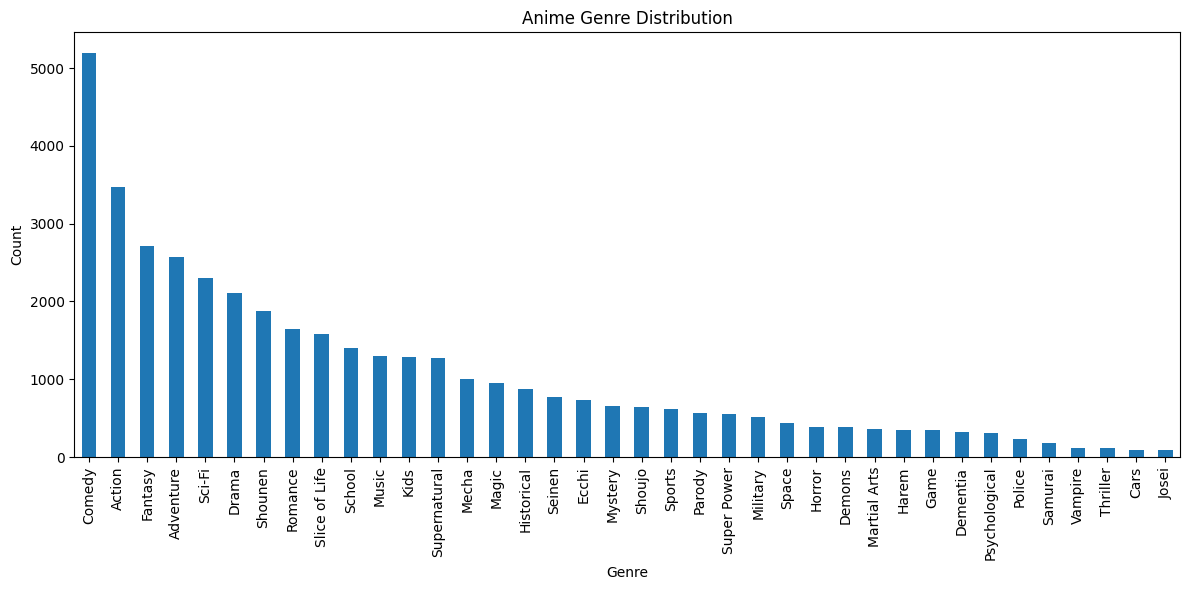

In [148]:
# Split genres and count occurrences
genre_counts = df_selected['Genres'].str.split(', ').explode().value_counts()

# Plot bar chart
plt.figure(figsize=(12,6))
genre_counts.plot(kind='bar')
plt.title('Anime Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Rating Visulaization

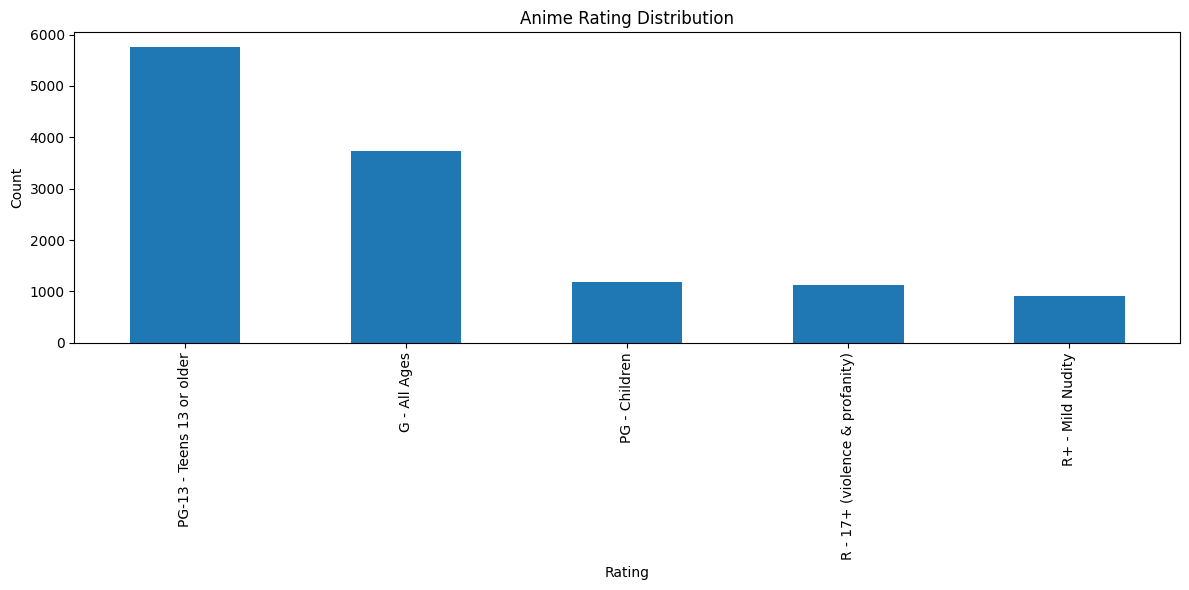

In [149]:
rating_counts = df_selected['Rating'].value_counts()

# Plot bar chart
plt.figure(figsize=(12,6))
rating_counts.plot(kind='bar')
plt.title('Anime Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Type Visualization

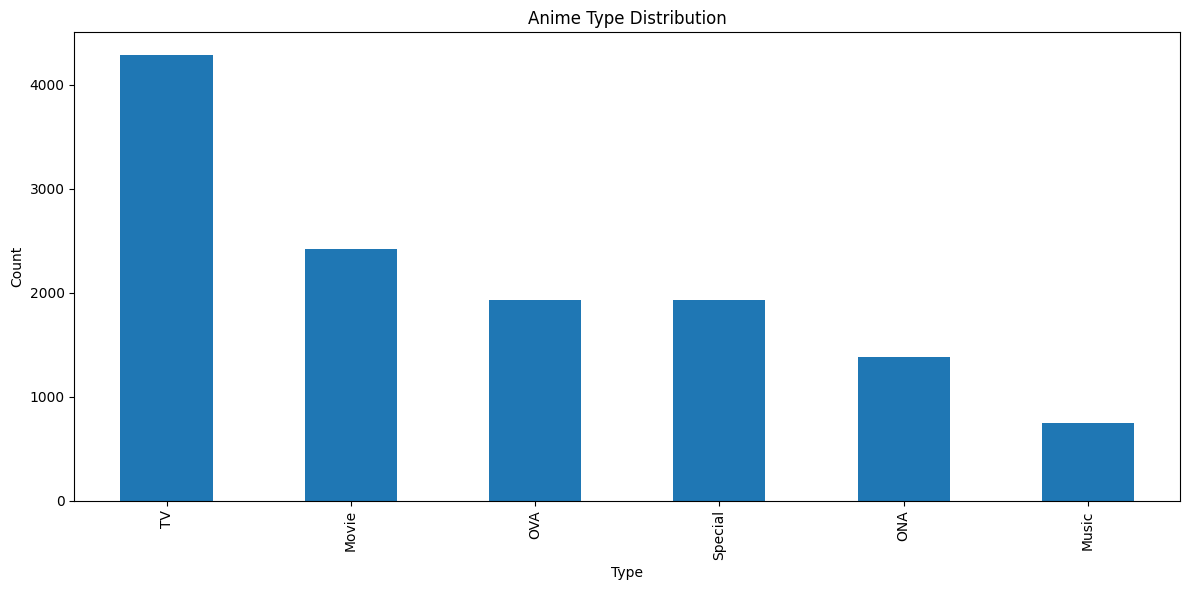

In [150]:
Type_counts = df_selected['Type'].value_counts()

# Plot bar chart
plt.figure(figsize=(12,6))
Type_counts.plot(kind='bar')
plt.title('Anime Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Saving Processed Dataset into CSV

In [151]:
df_selected.to_csv('anime_processed.csv', index=False)